![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/58563302-42466a80-8201-11e9-9948-b3e9f88a5662.jpg"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>

### Project

# Bike store sales

Let's put in practice the topics covered in the course and analyze sales made in a Bike Shop.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Hands on! 

In [1]:
import numpy as np
import pandas as pd

In [2]:
sales = pd.read_csv('sales_data.csv')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### First look at our data

Analyze what columns we have, what type they are and what data is on them.

In [3]:
sales.shape

(5000, 16)

In [11]:
sales.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Customer_Gender',
       'Country', 'State', 'Product_Category', 'Sub_Category', 'Product',
       'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Revenue'],
      dtype='object')

In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              5000 non-null   object
 1   Day               5000 non-null   int64 
 2   Month             5000 non-null   object
 3   Year              5000 non-null   int64 
 4   Customer_Age      5000 non-null   int64 
 5   Customer_Gender   5000 non-null   object
 6   Country           5000 non-null   object
 7   State             5000 non-null   object
 8   Product_Category  5000 non-null   object
 9   Sub_Category      5000 non-null   object
 10  Product           5000 non-null   object
 11  Order_Quantity    5000 non-null   int64 
 12  Unit_Cost         5000 non-null   int64 
 13  Unit_Price        5000 non-null   int64 
 14  Profit            5000 non-null   int64 
 15  Revenue           5000 non-null   int64 
dtypes: int64(8), object(8)
memory usage: 625.1+ KB


In [5]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue
0,2014-03-05,5,March,2014,34,M,United States,California,Accessories,Fenders,Fender Set - Mountain,27,8,22,366,582
1,2013-08-18,18,August,2013,31,F,Canada,British Columbia,Clothing,Vests,"Classic Vest, L",13,24,64,512,824
2,2014-02-04,4,February,2014,31,F,United States,Washington,Bikes,Touring Bikes,"Touring-1000 Yellow, 54",1,1482,2384,378,1860
3,2013-09-09,9,September,2013,33,M,Australia,Victoria,Accessories,Tires and Tubes,LL Road Tire,25,8,21,215,415
4,2016-05-16,16,May,2016,35,F,United States,Washington,Accessories,Tires and Tubes,Mountain Tire Tube,28,2,5,53,109


In [6]:
sales.tail()

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue
4995,2014-01-27,27,January,2014,34,M,United States,California,Accessories,Bottles and Cages,Water Bottle - 30 oz.,20,2,5,58,98
4996,2014-07-14,14,July,2014,17,M,France,Val d'Oise,Clothing,Caps,AWC Logo Cap,12,7,9,1,85
4997,2013-12-30,30,December,2013,25,F,Canada,British Columbia,Accessories,Helmets,"Sport-100 Helmet, Blue",20,13,35,433,693
4998,2016-01-06,6,January,2016,57,M,Canada,British Columbia,Accessories,Tires and Tubes,Patch Kit/8 Patches,16,1,2,16,32
4999,2014-03-09,9,March,2014,50,F,Australia,Queensland,Accessories,Tires and Tubes,Patch Kit/8 Patches,15,1,2,10,25


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Fixing column types

- Cast `Date` to `datetime`.
- Cast `Customer_Gender`, `Country`, `State`, `Product_Category` and `Sub_Category` to `category`.

In [7]:
# your code goes here
sales['Date'] = pd.to_datetime(sales['Date'])     # Cast `Date` to `datetime`.


for col in ['Customer_Gender', 'Country', 'State', 'Product_Category', 'Sub_Category']:
    sales[col] = sales[col].astype('category')

In [12]:
sales.dtypes

Date                datetime64[ns]
Day                          int64
Month                       object
Year                         int64
Customer_Age                 int64
Customer_Gender           category
Country                   category
State                     category
Product_Category          category
Sub_Category              category
Product                     object
Order_Quantity               int64
Unit_Cost                    int64
Unit_Price                   int64
Profit                       int64
Revenue                      int64
dtype: object

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Get a summary of the main statistics of the whole data

In [14]:
# your code goes here
sales.describe()

,Date,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue
count,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2014-11-24 09:47:13.920000,15.668800,2014.405000,35.933800,11.820400,278.415000,470.680600,291.653400,772.758000
min,2011-01-03 00:00:00,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-24.000000,2.000000
25%,2013-12-27 00:00:00,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,64.000000
50%,2014-07-02 12:00:00,16.000000,2014.000000,35.000000,10.000000,9.000000,25.000000,103.000000,226.000000
75%,2016-01-07 00:00:00,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,367.000000,829.250000
max,2016-07-31 00:00:00,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,5342.000000,14026.000000
std,NaN,8.797783,1.266055,11.087886,9.607841,562.721951,941.590529,457.359971,1306.052588


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What's the mean of `Customers_Age`?

In [15]:
# your code goes here
sales['Customer_Age'].mean()

np.float64(35.9338)

Go ahead and show a <b>density (KDE)</b> and a <b>box plot</b> with the `Customer_Age` data:

<Axes: ylabel='Density'>

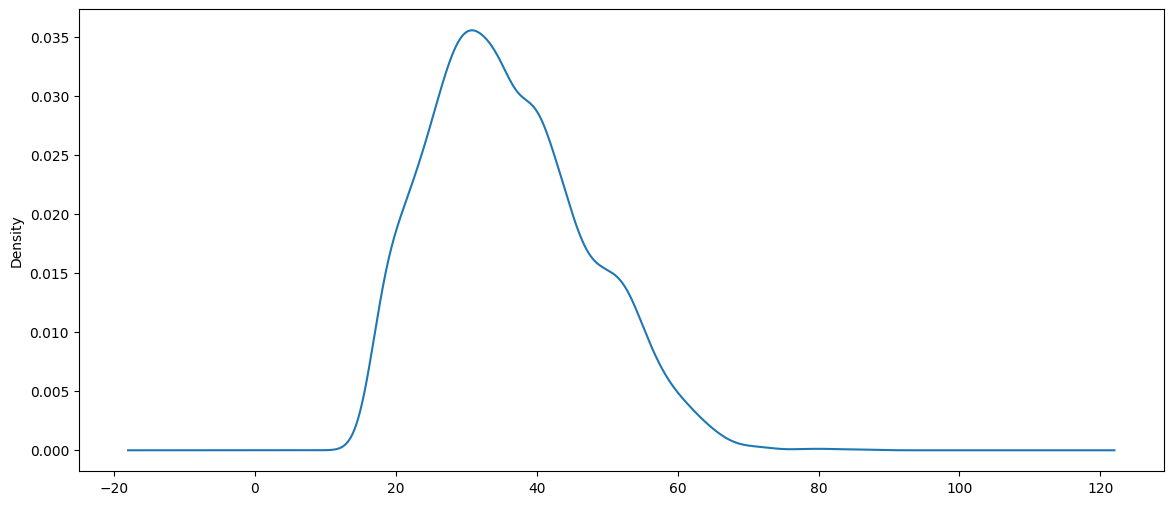

In [16]:
# your code goes here
sales['Customer_Age'].plot(kind='kde', figsize=(14, 6))

<Axes: >

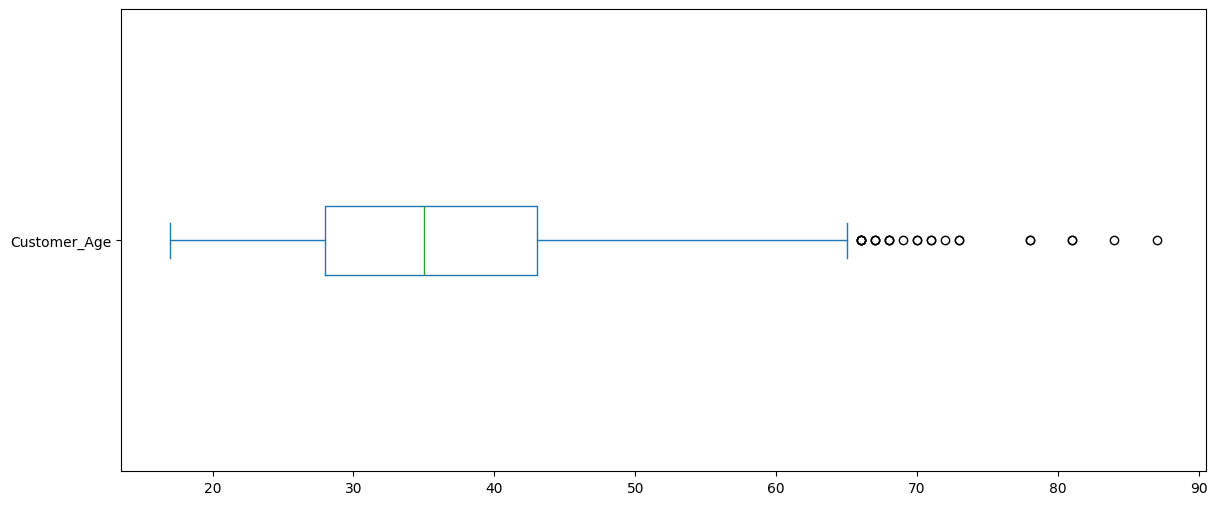

In [23]:
sales['Customer_Age'].plot(kind='box', vert=False, figsize=(14, 6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What's the mean of `Order_Quantity`?

In [26]:
# your code goes here
sales['Order_Quantity'].mean()

np.float64(11.8204)

Go ahead and show a <b>histogram</b> and a <b>box plot</b> with the `Order_Quantity` data:

<Axes: ylabel='Frequency'>

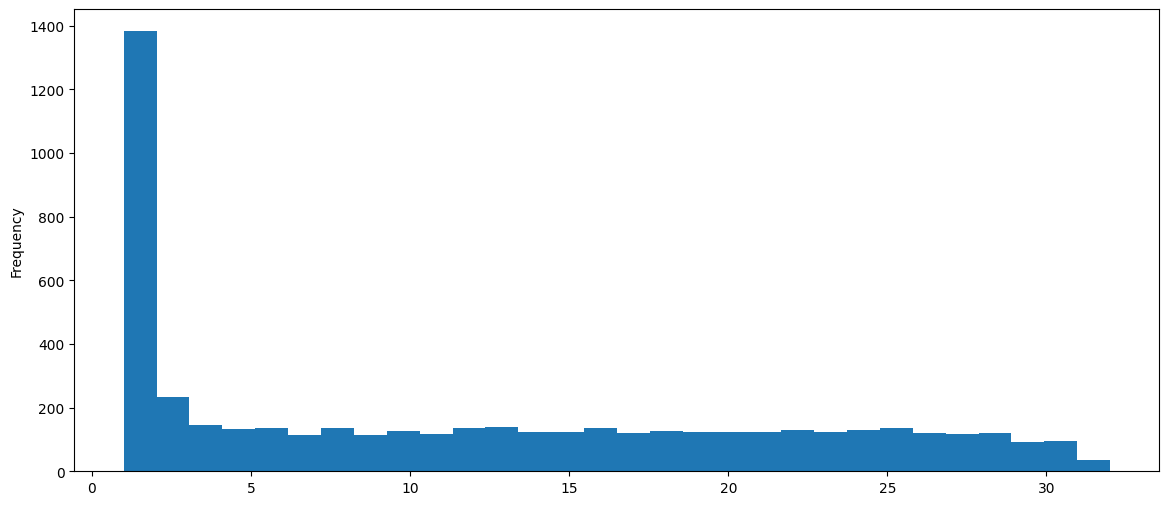

In [35]:
# your code goes here
sales['Order_Quantity'].plot(kind='hist', bins=30, figsize=(14, 6)) # histogram


<Axes: >

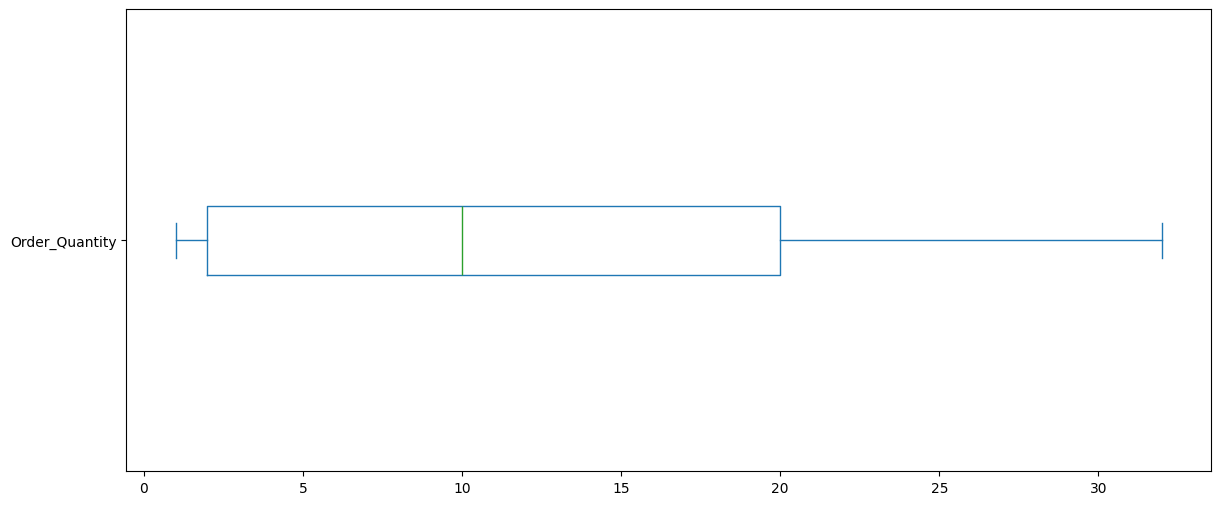

In [36]:
sales['Order_Quantity'].plot(kind='box', vert=False, figsize=(14, 6)) # box plot

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### In which countries were sales made?

In [37]:
# your code goes here
sales['Country'].unique()

['United States', 'Canada', 'Australia', 'United Kingdom', 'Germany', 'France']
Categories (6, object): ['Australia', 'Canada', 'France', 'Germany', 'United Kingdom', 'United States']

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Sort sales by year

Older sales should be at the bottom.

In [38]:
# your code goes here
sales.sort_values(['Year'], ascending=False, inplace=True)

In [41]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue
4955,2016-01-20,20,January,2016,36,F,United States,California,Accessories,Tires and Tubes,Patch Kit/8 Patches,11,1,2,11,22
4934,2016-04-14,14,April,2016,35,M,Germany,Nordrhein-Westfalen,Accessories,Helmets,"Sport-100 Helmet, Red",12,13,35,209,365
4941,2016-06-29,29,June,2016,23,F,Canada,British Columbia,Accessories,Cleaners,Bike Wash - Dissolver,24,3,8,118,190
10,2016-03-28,28,March,2016,19,F,United States,Washington,Accessories,Tires and Tubes,Road Tire Tube,18,1,4,38,56
4998,2016-01-06,6,January,2016,57,M,Canada,British Columbia,Accessories,Tires and Tubes,Patch Kit/8 Patches,16,1,2,16,32


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Reset the current index

Don't keep the old index.

In [42]:
# your code goes here
sales.reset_index(drop=True, inplace=True)

In [43]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue
0,2016-01-20,20,January,2016,36,F,United States,California,Accessories,Tires and Tubes,Patch Kit/8 Patches,11,1,2,11,22
1,2016-04-14,14,April,2016,35,M,Germany,Nordrhein-Westfalen,Accessories,Helmets,"Sport-100 Helmet, Red",12,13,35,209,365
2,2016-06-29,29,June,2016,23,F,Canada,British Columbia,Accessories,Cleaners,Bike Wash - Dissolver,24,3,8,118,190
3,2016-03-28,28,March,2016,19,F,United States,Washington,Accessories,Tires and Tubes,Road Tire Tube,18,1,4,38,56
4,2016-01-06,6,January,2016,57,M,Canada,British Columbia,Accessories,Tires and Tubes,Patch Kit/8 Patches,16,1,2,16,32


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many sales per year do we have?

In [44]:
# your code goes here
sales['Year'].value_counts()

Year
2014    1327
2016    1272
2015    1123
2013    1040
2011     126
2012     112
Name: count, dtype: int64

Go ahead and show a <b>pie plot</b> and a <b>bar plot</b> with the previous data:

<Axes: ylabel='count'>

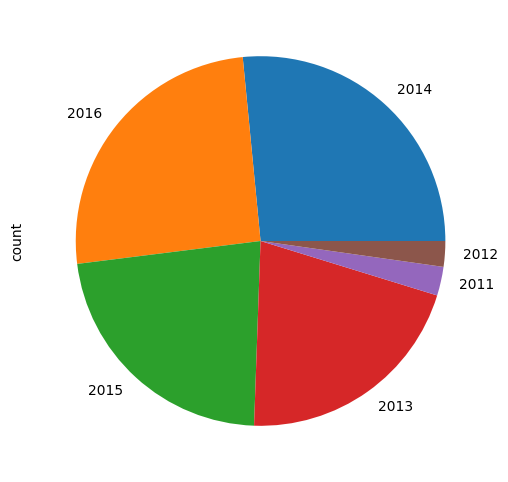

In [46]:
# your code goes here
sales['Year'].value_counts().plot(kind='pie', figsize=(14, 6))    # pie plot

<Axes: xlabel='Year'>

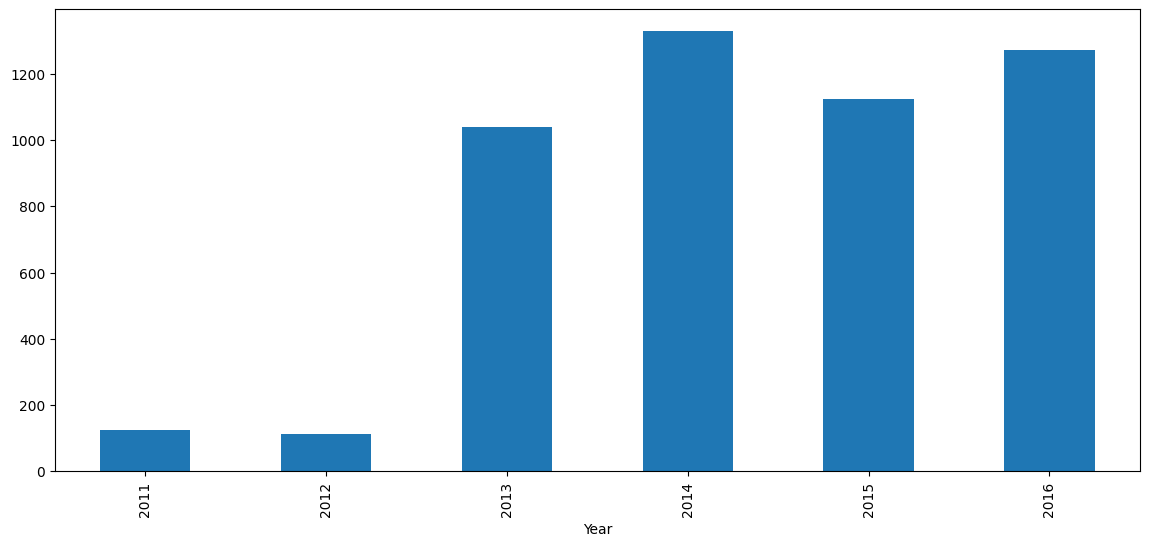

In [48]:
# your code goes here
sales['Year'].value_counts().sort_index().plot(kind='bar', figsize=(14, 6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Create a new `Cost` column

This column should be:
$$ Cost = Unit\_Cost * Order\_Quantity $$

In [49]:
# your code goes here
sales['Cost'] = sales['Unit_Cost'] * sales['Order_Quantity']

sales['Cost']

0         11
1        156
2         72
3         18
4         16
        ... 
4995    1555
4996    1555
4997     487
4998    1555
4999    2171
Name: Cost, Length: 5000, dtype: int64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Create a new `YearMonth` column

This new `YearMonth` column should be the concatenation of `Year` and `Month` columns, separated by a '-'.

In [50]:
# your code goes here
sales['YearMonth'] = sales['Year'].astype('str') + '-' + sales['Month']

sales['YearMonth']

0        2016-January
1          2016-April
2           2016-June
3          2016-March
4        2016-January
            ...      
4995      2011-August
4996     2011-October
4997       2011-April
4998    2011-February
4999     2011-January
Name: YearMonth, Length: 5000, dtype: object

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How did sales evolve through the years?

Count how many sales we have per `YearMonth`.

In [51]:
# your code goes here
sales['YearMonth'].value_counts()

YearMonth
2015-December    232
2016-April       218
2014-June        215
2013-December    215
2016-May         214
                ... 
2012-December      7
2012-February      6
2011-February      6
2011-June          6
2012-March         4
Name: count, Length: 62, dtype: int64

Go ahead and show a <b>bar plot</b> with the previous data:

<Axes: xlabel='YearMonth'>

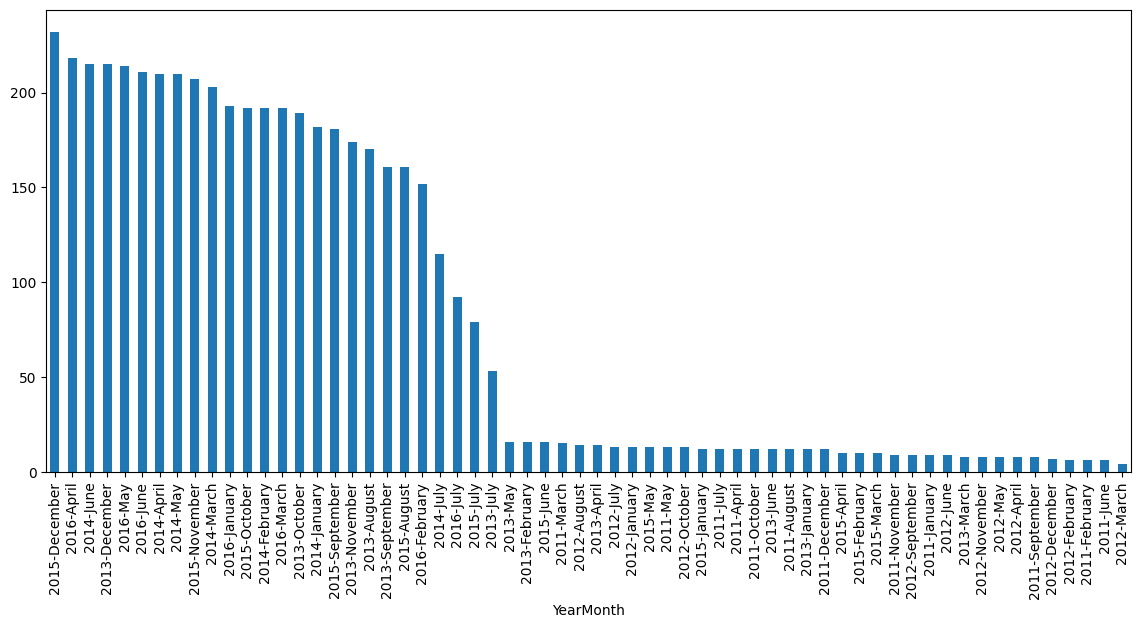

In [61]:
# your code goes here
sales['YearMonth'].value_counts().plot(kind='bar', figsize=(14, 6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Which country has the most sales `quantity of sales`?

In [64]:
# your code goes here
sales['Country'].value_counts().head(1)

Country
United States    1700
Name: count, dtype: int64

In [67]:
sales['Country'].value_counts()

Country
United States     1700
Australia         1066
Canada             657
United Kingdom     604
France             489
Germany            484
Name: count, dtype: int64

Go ahead and show a <b>bar plot</b> of the sales per country:

<Axes: xlabel='Country'>

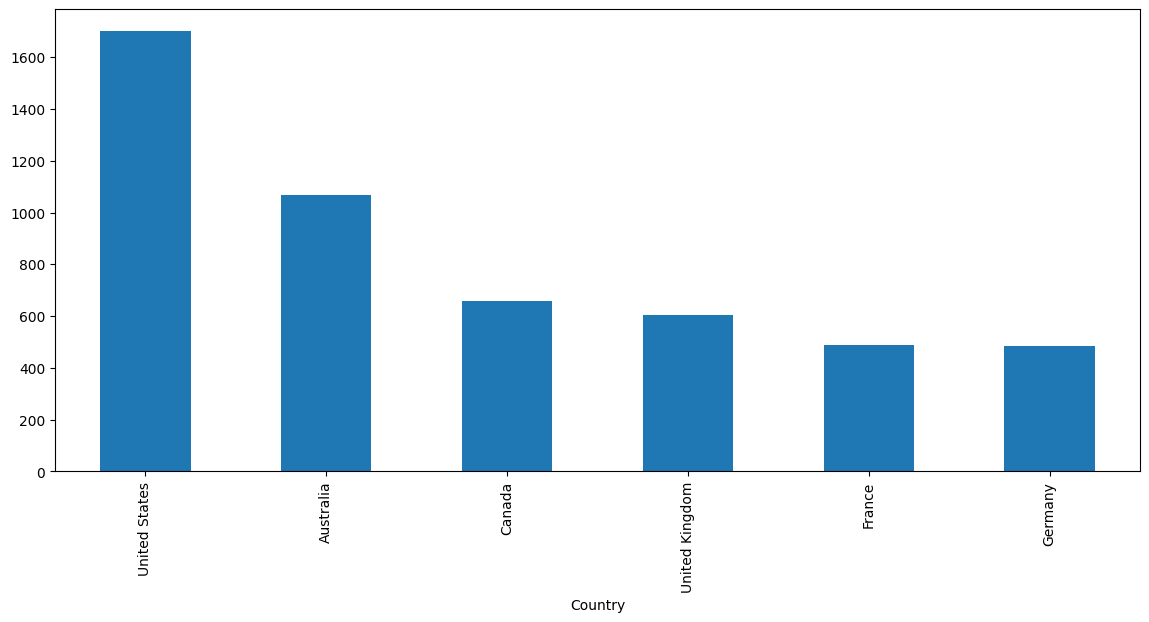

In [68]:
# your code goes here
sales['Country'].value_counts().plot(kind='bar', figsize=(14, 6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Get a list of every product sold

In [70]:
# your code goes here
sales['Product'].unique()

array(['Patch Kit/8 Patches', 'Sport-100 Helmet, Red',
       'Bike Wash - Dissolver', 'Road Tire Tube', 'Touring Tire',
       'AWC Logo Cap', 'Mountain Tire Tube', 'Sport-100 Helmet, Blue',
       'Classic Vest, L', 'Water Bottle - 30 oz.', 'Road Bottle Cage',
       'HL Mountain Tire', 'Road-550-W Yellow, 48', 'ML Mountain Tire',
       'Short-Sleeve Classic Jersey, S', 'Fender Set - Mountain',
       'Half-Finger Gloves, L', 'Long-Sleeve Logo Jersey, S',
       'HL Road Tire', 'Touring Tire Tube', 'Mountain Bottle Cage',
       'Road-250 Red, 44', 'Mountain-200 Silver, 42',
       'Touring-2000 Blue, 50', 'Touring-3000 Yellow, 58',
       'Mountain-400-W Silver, 42', "Women's Mountain Shorts, L",
       'Road-250 Red, 58', 'Mountain-200 Black, 38', 'ML Road Tire',
       'Short-Sleeve Classic Jersey, L', 'Mountain-500 Black, 44',
       'Short-Sleeve Classic Jersey, M', 'Road-750 Black, 48',
       'Road-150 Red, 44', 'Touring-3000 Yellow, 50', 'Road-150 Red, 62',
       'Road-350-

Create a **bar plot** showing the 10 most sold products (best sellers):

<Axes: xlabel='Product'>

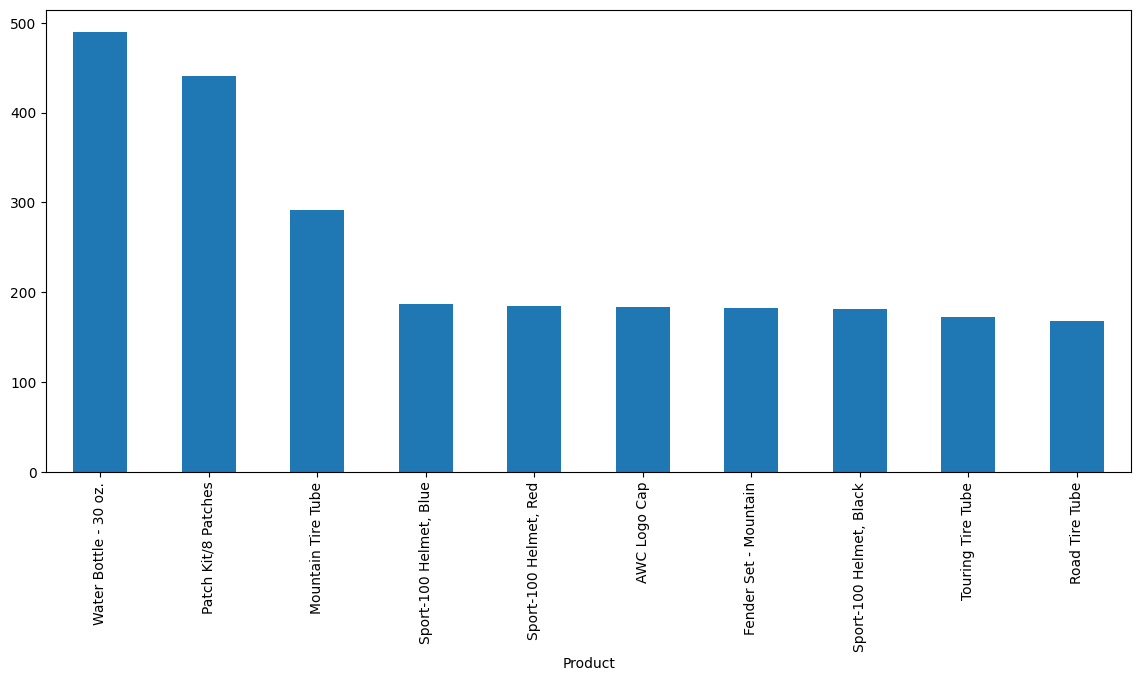

In [72]:
# your code goes here
sales['Product'].value_counts().head(10).plot(kind='bar', figsize=(14, 6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Can you see any relationship between `Unit_Cost` and `Unit_Price`?

Show a <b>scatter plot</b> between both columns.

<Axes: xlabel='Unit_Cost', ylabel='Unit_Price'>

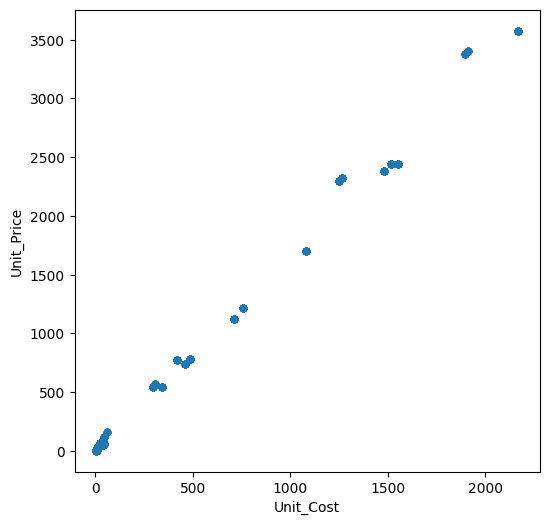

In [78]:
# your code goes here
sales.plot(kind='scatter', x='Unit_Cost', y='Unit_Price', figsize=(6, 6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Can you see any relationship between `Order_Quantity` and `Profit`?

Show a <b>scatter plot</b> between both columns.

<Axes: xlabel='Order_Quantity', ylabel='Profit'>

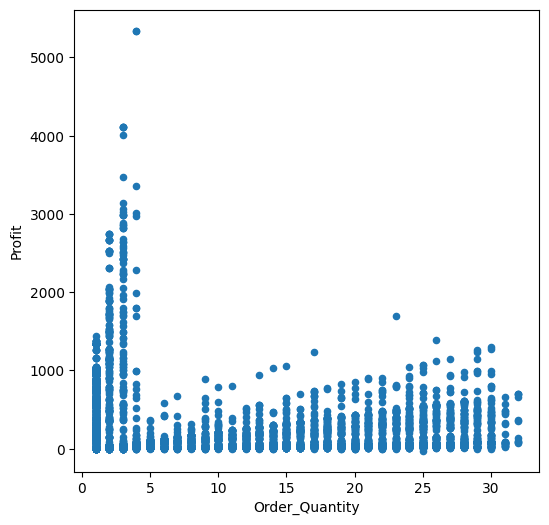

In [76]:
# your code goes here
sales.plot(kind='scatter', x='Order_Quantity', y='Profit', figsize=(6, 6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Can you see any relationship between `Profit` per `Country`?

Show a grouped <b>box plot</b> per country with the profit values.

<Axes: title={'center': 'Profit'}, xlabel='[Country]'>

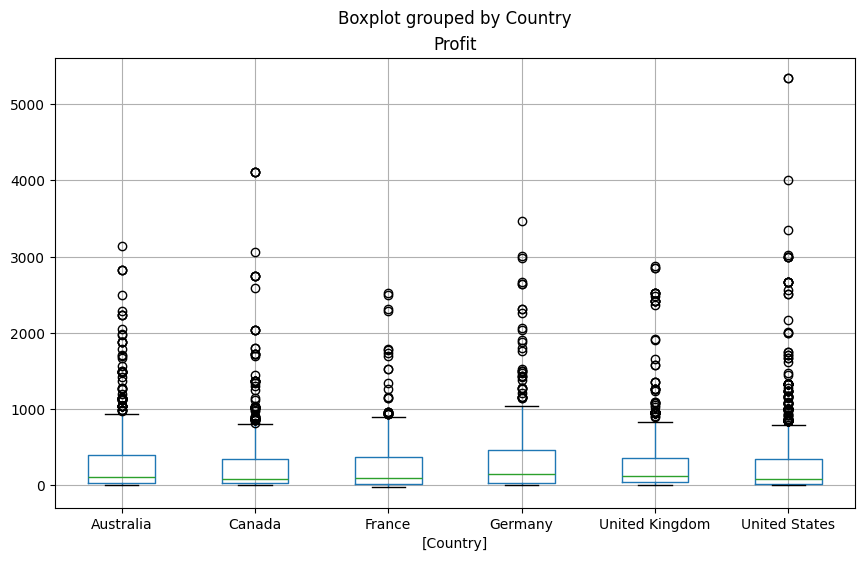

In [79]:
# your code goes here
sales[['Profit', 'Country']].boxplot(by='Country', figsize=(10, 6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Can you see any relationship between the `Customer_Age` per `Country`?

Show a grouped <b>box plot</b> per country with the customer age values.

<Axes: title={'center': 'Customer_Age'}, xlabel='[Country]'>

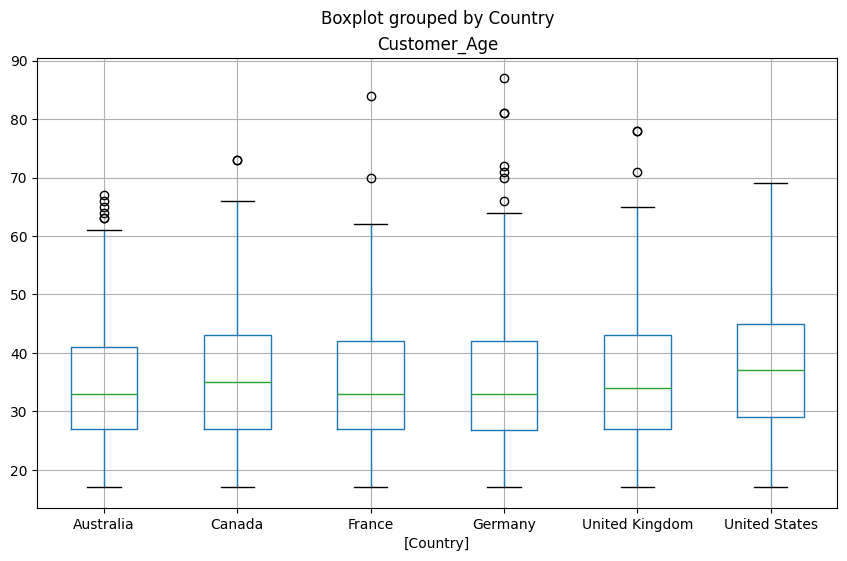

In [80]:
# your code goes here
sales[['Customer_Age', 'Country']].boxplot(by='Country', figsize=(10, 6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Increase 50 U$S revenue to every sale

In [81]:
# your code goes here
sales['Revenue'] += 50

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made in `Canada` or `France`?

In [84]:
# your code goes here

sales.loc[(sales['Country'] == 'Canada') | (sales['Country'] == 'France')].shape[0]

1146

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many `Bike Racks` orders were made from Canada?

In [86]:
# your code goes here
sales.loc[(sales['Country'] == 'Canada') & (sales['Sub_Category'] == 'Bike Racks')].shape[0]

3

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made in each region (state) of France?

In [90]:
# your code goes here
state_france = sales.loc[sales['Country'] == 'France', 'State'].value_counts()

state_france

State
Seine (Paris)          101
Seine Saint Denis       87
Nord                    76
Yveline                 48
Hauts de Seine          41
Essonne                 40
Seine et Marne          16
Moselle                 16
Loiret                  13
Val d'Oise              11
Charente-Maritime       10
Garonne (Haute)         10
Pas de Calais            6
Val de Marne             5
Loir et Cher             5
Somme                    4
England                  0
California               0
Brandenburg              0
British Columbia         0
Bayern                   0
Alberta                  0
Hamburg                  0
Georgia                  0
Oregon                   0
Ohio                     0
Nordrhein-Westfalen      0
New York                 0
Missouri                 0
New South Wales          0
Kentucky                 0
Hessen                   0
South Australia          0
Saarland                 0
Queensland               0
Tasmania                 0
Utah                  

Go ahead and show a <b>bar plot</b> with the results:

<Axes: xlabel='State'>

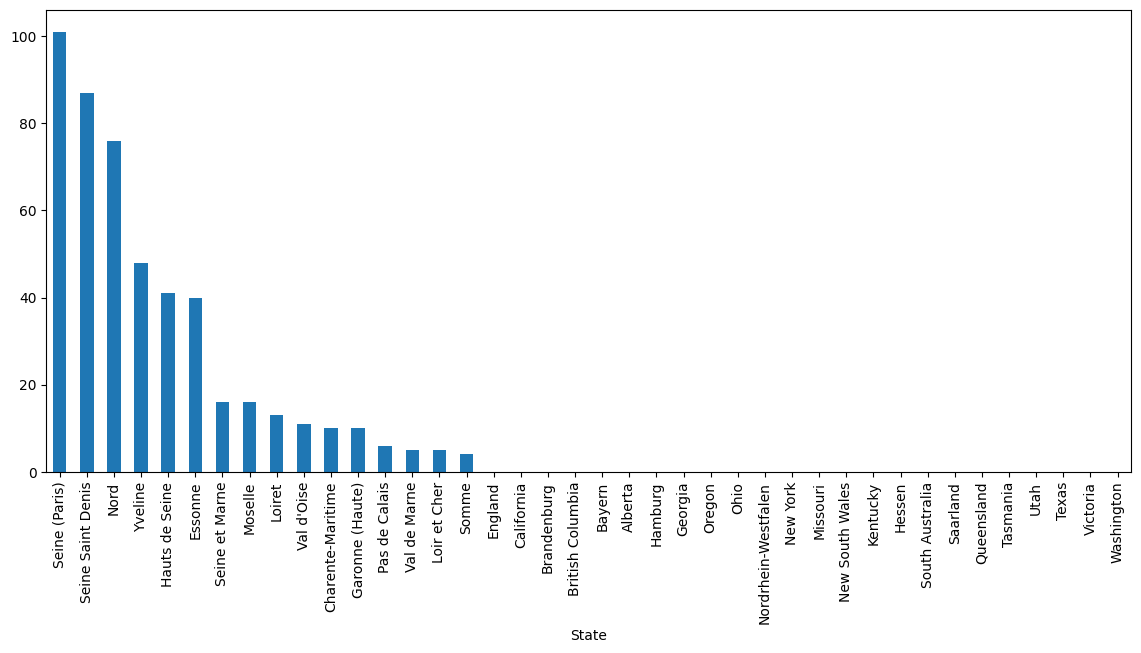

In [89]:
# your code goes here
state_france.plot(kind='bar', figsize=(14, 6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many sales were made per category?

In [91]:
# your code goes here
sales['Product_Category'].value_counts()

Product_Category
Accessories    3090
Bikes          1166
Clothing        744
Name: count, dtype: int64

Go ahead and show a <b>pie plot</b> with the results:

<Axes: ylabel='count'>

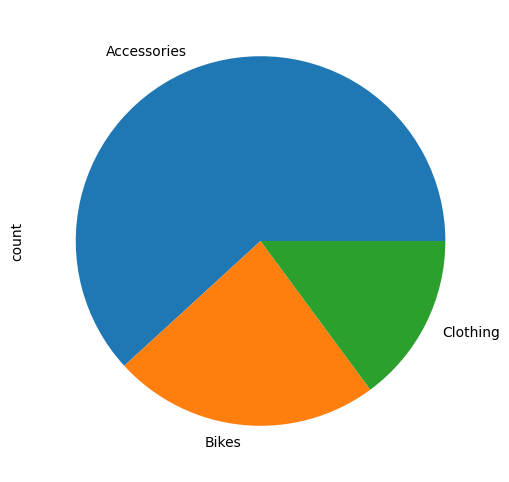

In [93]:
# your code goes here
sales['Product_Category'].value_counts().plot(kind='pie', figsize=(14, 6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made per accessory sub-categories?

In [95]:
# your code goes here
accessories = sales.loc[sales['Product_Category'] == 'Accessories', 'Sub_Category'].value_counts()

accessories

Sub_Category
Tires and Tubes      1458
Bottles and Cages     719
Helmets               553
Fenders               183
Cleaners               78
Hydration Packs        64
Bike Racks             26
Bike Stands             9
Caps                    0
Gloves                  0
Jerseys                 0
Road Bikes              0
Mountain Bikes          0
Shorts                  0
Socks                   0
Touring Bikes           0
Vests                   0
Name: count, dtype: int64

Go ahead and show a <b>bar plot</b> with the results:

<Axes: xlabel='Sub_Category'>

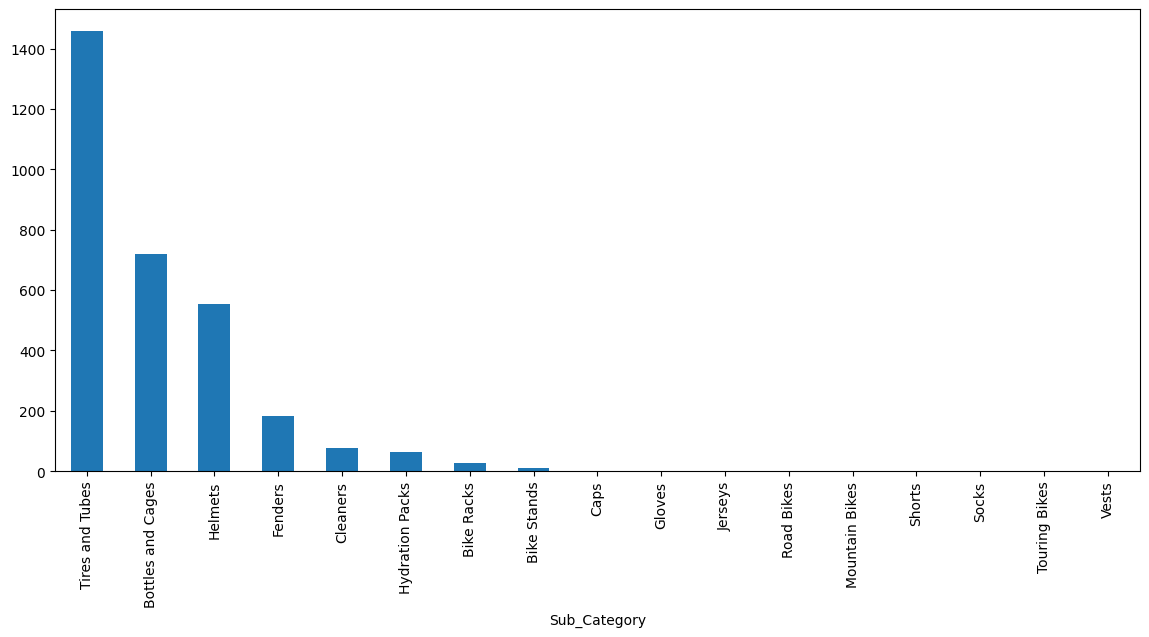

In [96]:
# your code goes here
accessories.plot(kind='bar', figsize=(14, 6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made per bike sub-categories?

In [97]:
# your code goes here
bikes = sales.loc[sales['Product_Category'] == 'Bikes', 'Sub_Category'].value_counts()
bikes

Sub_Category
Road Bikes           600
Mountain Bikes       391
Touring Bikes        175
Bike Racks             0
Bike Stands            0
Fenders                0
Bottles and Cages      0
Caps                   0
Cleaners               0
Hydration Packs        0
Helmets                0
Gloves                 0
Jerseys                0
Shorts                 0
Socks                  0
Tires and Tubes        0
Vests                  0
Name: count, dtype: int64

Go ahead and show a <b>pie plot</b> with the results:

<Axes: ylabel='count'>

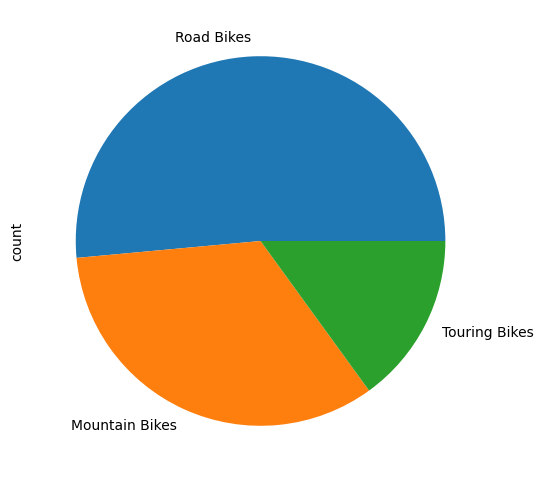

In [101]:
# your code goes here
bikes.plot(kind='pie', figsize=(6, 6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Which gender has the most amount of sales?

<Axes: xlabel='Customer_Gender'>

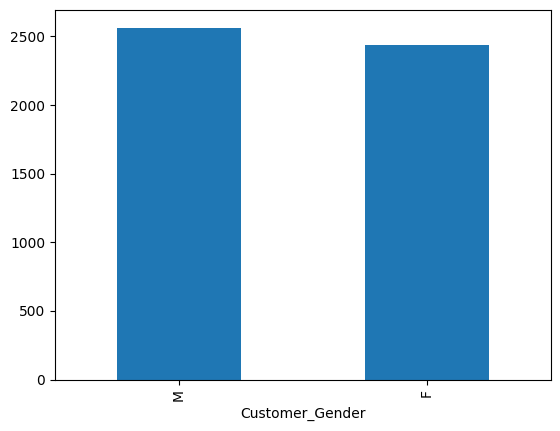

In [105]:
# your code goes here
sales['Customer_Gender'].value_counts().plot(kind='bar')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many sales with more than 500 in `Revenue` were made by men?

In [106]:
# your code goes here
sales.loc[(sales['Customer_Gender'] == 'M') & (sales['Revenue'] == 500)].shape[0]

1

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Get the top-5 sales with the highest revenue

In [107]:
# your code goes here
sales.sort_values(['Revenue'], ascending=False).head(5)

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue,Cost,YearMonth
4913,2011-01-17,17,January,2011,44,F,United States,California,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5342,14076,8684,2011-January
4957,2011-03-27,27,March,2011,24,M,United States,California,Bikes,Road Bikes,"Road-150 Red, 44",4,2171,3578,5342,14076,8684,2011-March
943,2016-01-09,9,January,2016,40,F,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 52",3,2171,3578,4114,10677,6513,2016-January
4900,2011-12-29,29,December,2011,25,M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",3,2171,3578,4114,10677,6513,2011-December
2178,2015-12-11,11,December,2015,44,M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",3,2171,3578,4114,10677,6513,2015-December


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Get the sale with the highest revenue

In [108]:
# your code goes here
sales['Revenue'].max()

np.int64(14076)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What is the mean `Order_Quantity` of orders with more than 10K in revenue?

In [109]:
# your code goes here
cond = sales['Revenue'] > 10_000
sales.loc[cond, 'Order_Quantity'].mean()

np.float64(3.25)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What is the mean `Order_Quantity` of orders with less than 10K in revenue?

In [112]:
# your code goes here
cond_less = sales['Revenue'] < 10_000
sales.loc[cond_less, 'Order_Quantity'].mean()

np.float64(11.834134615384615)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made in May of 2016?

In [116]:
# your code goes here
sales.loc[(sales['Year'] == 2016) & (sales['Month'] == 'May')].shape[0]

214

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made between May and July of 2016?

In [120]:
# your code goes here
sales.loc[(sales['Year'] == 2016) & (sales['Month'].isin(['May', 'June', 'July']))].shape[0]

517

Show a grouped <b>box plot</b> per month with the profit values.

<Axes: title={'center': 'Profit'}, xlabel='[Month]'>

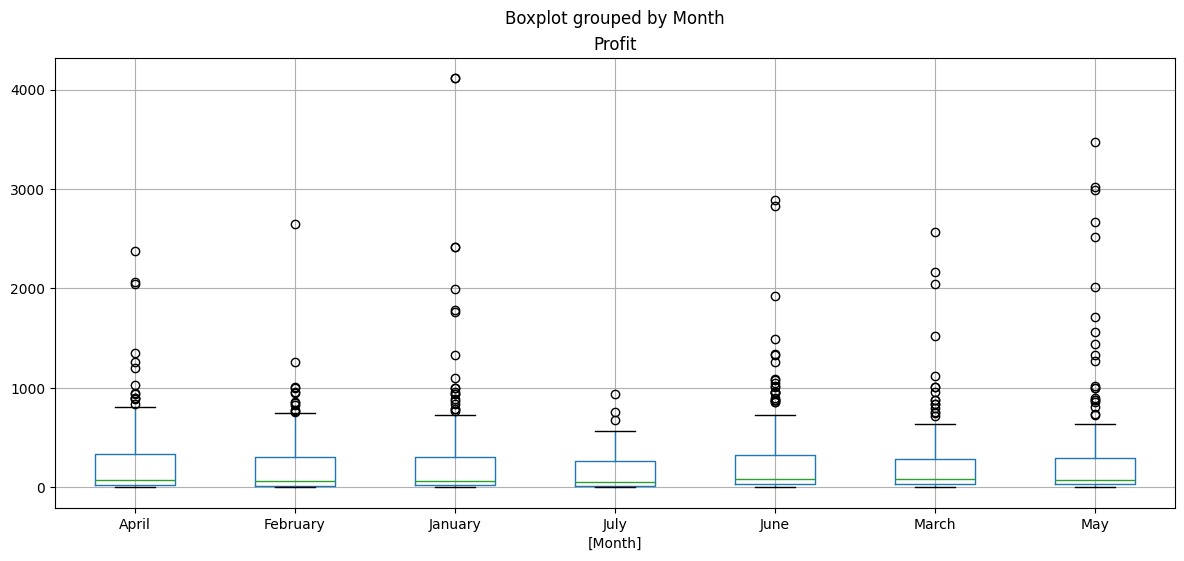

In [121]:
# your code goes here
profit_2016 = sales.loc[sales['Year'] == 2016, ['Profit', 'Month']]
profit_2016.boxplot(by='Month', figsize=(14, 6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Add 7.2% TAX on every sale `Unit_Price` within United States

In [ ]:
# your code goes here
sales.loc[sales['Country'] == 'United States', 'Unit_Price'] *= 1.072

C:\Users\abdul\AppData\Local\Temp\ipykernel_18528\852808900.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[2.144000e+00 4.288000e+00 9.648000e+00 ... 3.835616e+03 2.460240e+03
 3.835616e+03]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  sales.loc[sales['Country'] == 'United States', 'Unit_Price'] *= 1.072


In [123]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue,Cost,YearMonth
0,2016-01-20,20,January,2016,36,F,United States,California,Accessories,Tires and Tubes,Patch Kit/8 Patches,11,1,2.144,11,72,11,2016-January
1,2016-04-14,14,April,2016,35,M,Germany,Nordrhein-Westfalen,Accessories,Helmets,"Sport-100 Helmet, Red",12,13,35.000,209,415,156,2016-April
2,2016-06-29,29,June,2016,23,F,Canada,British Columbia,Accessories,Cleaners,Bike Wash - Dissolver,24,3,8.000,118,240,72,2016-June
3,2016-03-28,28,March,2016,19,F,United States,Washington,Accessories,Tires and Tubes,Road Tire Tube,18,1,4.288,38,106,18,2016-March
4,2016-01-06,6,January,2016,57,M,Canada,British Columbia,Accessories,Tires and Tubes,Patch Kit/8 Patches,16,1,2.000,16,82,16,2016-January


In [124]:
sales.to_csv('sales_after_analysis.csv', index=False)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)